In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

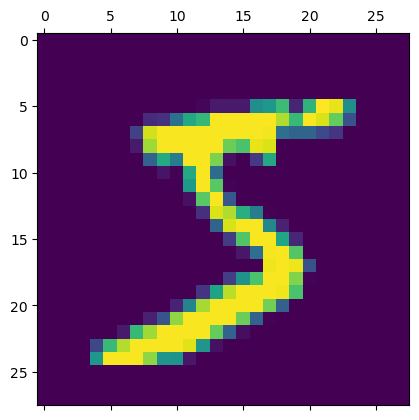

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train=X_train/255
X_test=X_test/255

In [22]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [23]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

In [25]:
X_test_flattened.shape

(10000, 784)

In [26]:
import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


In [29]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']          
)

In [30]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2623 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2583 - accuracy: 0.9281
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9289
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9302
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2511 - accuracy: 0.9308


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2664 - accuracy: 0.9263


[0.26642027497291565, 0.9262999892234802]

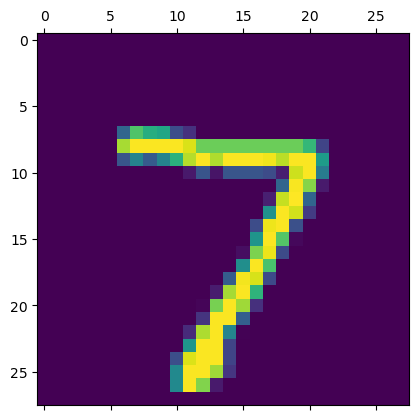

In [32]:
plt.matshow(X_test[0])

In [33]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 847us/step


array([3.35285277e-03, 1.09830163e-08, 1.04691805e-02, 9.59809244e-01,
       8.37962260e-04, 1.25266850e-01, 1.45616541e-08, 9.99795735e-01,
       5.66218123e-02, 6.86696947e-01], dtype=float32)

In [34]:
np.argmax(y_predicted[0])

7

In [35]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [37]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    6,    7,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,    9,  907,   27,    9,    4,   14,    9,   41,    5],
       [   2,    0,   13,  933,    0,   17,    3,    9,   21,   12],
       [   1,    1,    3,    2,  905,    0,   12,    4,    8,   46],
       [   8,    2,    1,   38,    8,  771,   15,    8,   34,    7],
       [   9,    3,    3,    2,    7,   12,  919,    1,    2,    0],
       [   1,    6,   22,    8,    5,    1,    0,  942,    1,   42],
       [   7,    8,    4,   20,    9,   21,    9,   10,  871,   15],
       [  11,    7,    1,    9,   19,    4,    0,   13,    6,  939]])>

Text(108.22222222222221, 0.5, 'Truth')

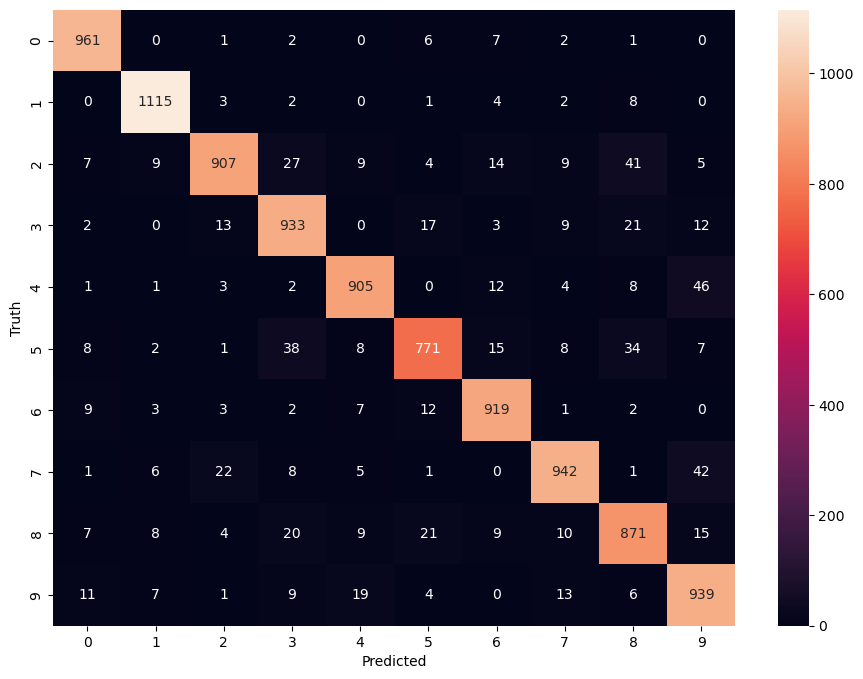

In [40]:
import seaborn as sns
plt.figure(figsize=(11,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model=keras.Sequential(
[
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]
)
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1287 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0547 - accuracy: 0.9834


In [44]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9739


[0.08854307234287262, 0.9739000201225281]

In [47]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    3,    0,    1,    1,    1,    1,    1,    2],
       [   0, 1121,    5,    1,    0,    0,    2,    2,    4,    0],
       [   3,    2, 1012,    1,    2,    0,    1,    8,    3,    0],
       [   0,    0,    7,  990,    0,    4,    1,    5,    2,    1],
       [   1,    0,    4,    1,  961,    0,    3,    3,    1,    8],
       [   3,    0,    0,   12,    2,  865,    5,    1,    2,    2],
       [   6,    3,    2,    1,    2,    6,  937,    0,    1,    0],
       [   0,    4,    9,    3,    1,    0,    0, 1004,    0,    7],
       [   6,    1,    8,   19,    3,    5,    5,    9,  915,    3],
       [   1,    5,    0,   11,   10,    4,    0,   12,    1,  965]])>

Text(95.72222222222221, 0.5, 'Truth')

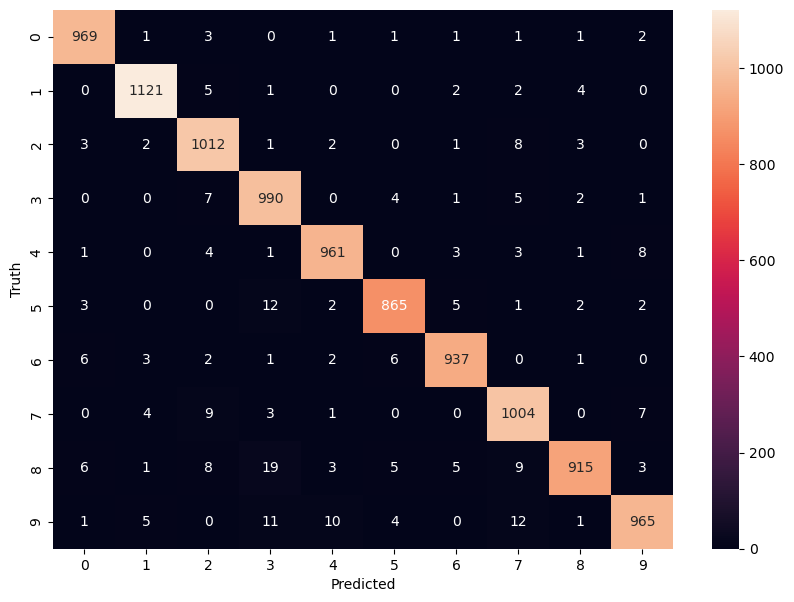

In [48]:

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
]
)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2688 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0845 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0503 - accuracy: 0.9849
